In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline


ch = pd.read_csv("GPR_ele_drone.txt", delim_whitespace=True,
          header=None, names=["Elev","Index"])
tr = pd.read_csv("trace.txt", delim_whitespace=True,
          header=None, names=["GPR_points"])


N = 110
max = 0

size = np.zeros(shape=(N), dtype=int)
size2 = np.zeros(shape=(N), dtype=int)

for i in np.arange(1,N+1,1):
    tm = ch.loc[ch["Index"]==i,["Elev"]]
    size[i-1] = np.size(tm)
   
max = np.max(size)
    
print("max number of GNSS points",max)

for i in np.arange(1,N+1,1):
    size2[i-1] = tr["GPR_points"][i-1]
#    print(size2[i-1])
min = np.min(size2)
print("min number of GPR points",min)

#The shape of final output
Elev_ch4 = np.zeros(shape=(N,min))
Elev_ch5 = np.zeros(shape=(N,min))


max number of GNSS points 1525
min number of GPR points 1498


In [409]:
GNSS_drone = np.zeros(shape=(N,max))
GNSS_corr = np.zeros(shape=(N,max))

for n in np.arange(0,N,1):

    print("++++++")
    print("n=",n)
    print("++++++")
    tm = ch.loc[ch["Index"]==n,["Elev"]]
    
    tm_size = np.size(tm)

    for j in np.arange(0,tm_size,1):
        GNSS_drone[n-1][j] = tm["Elev"][j+sum(size[:(n)])]
    


++++++
n= 0
++++++
++++++
n= 1
++++++
++++++
n= 2
++++++
++++++
n= 3
++++++
++++++
n= 4
++++++
++++++
n= 5
++++++
++++++
n= 6
++++++
++++++
n= 7
++++++
++++++
n= 8
++++++
++++++
n= 9
++++++
++++++
n= 10
++++++
++++++
n= 11
++++++
++++++
n= 12
++++++
++++++
n= 13
++++++
++++++
n= 14
++++++
++++++
n= 15
++++++
++++++
n= 16
++++++
++++++
n= 17
++++++
++++++
n= 18
++++++
++++++
n= 19
++++++
++++++
n= 20
++++++
++++++
n= 21
++++++
++++++
n= 22
++++++
++++++
n= 23
++++++
++++++
n= 24
++++++
++++++
n= 25
++++++
++++++
n= 26
++++++
++++++
n= 27
++++++
++++++
n= 28
++++++
++++++
n= 29
++++++
++++++
n= 30
++++++
++++++
n= 31
++++++
++++++
n= 32
++++++
++++++
n= 33
++++++
++++++
n= 34
++++++
++++++
n= 35
++++++
++++++
n= 36
++++++
++++++
n= 37
++++++
++++++
n= 38
++++++
++++++
n= 39
++++++
++++++
n= 40
++++++
++++++
n= 41
++++++
++++++
n= 42
++++++
++++++
n= 43
++++++
++++++
n= 44
++++++
++++++
n= 45
++++++
++++++
n= 46
++++++
++++++
n= 47
++++++
++++++
n= 48
++++++
++++++
n= 49
++++++
++++++
n= 

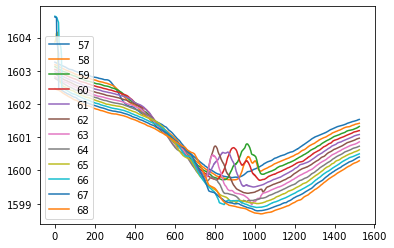

In [410]:
s = 57
e = 69
for t in np.arange(s,e,1):
    plt.plot(GNSS_drone[t][:])
plt.legend(np.arange(s,e,1))

(1595.0, 1610.0)

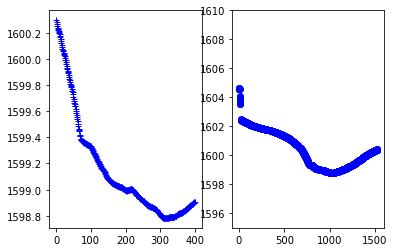

In [411]:
plt.subplot(1,2,1)
plt.plot(GNSS_drone[67][700:1100],"b+")

plt.subplot(1,2,2)
plt.plot(GNSS_drone[67][:],"bo")
   
plt.ylim(1595,1610)

(1595.0, 1610.0)

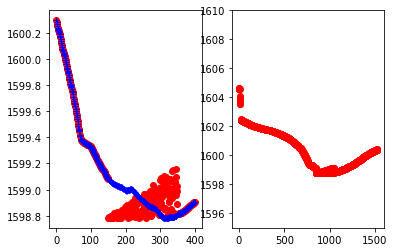

In [413]:
for i in np.arange(1,N+1,1):
    for t in np.arange(0,max,1):
        GNSS_corr[n-i][t] = GNSS_drone[n-i][t]

st = 850
et = 1050
i = 0.0

for t in np.arange(st,et,1):
#    GNSS_corr[59][t] = np.random.normal((GNSS_corr[59][st-1]+GNSS_corr[59][et+1])/2.0,0.01,1)
#    GNSS_corr[59][t] = np.random.uniform(np.min(GNSS_corr[59][:]),GNSS_corr[59][et+1])
    i = i + 10**(-2.7)
    GNSS_corr[67][t] = np.random.uniform(np.min(GNSS_corr[67][:]),np.min(GNSS_corr[67][:])+i )


plt.subplot(1,2,1)
plt.plot(GNSS_corr[67][700:1100],"ro")
plt.plot(GNSS_drone[67][700:1100],"b+")

plt.subplot(1,2,2)
plt.plot(GNSS_corr[67][:],"ro")

plt.ylim(1595,1610)

[[1604.62   ]
 [1604.6167 ]
 [1604.6095 ]
 ...
 [1600.40112]
 [1600.40344]
 [1600.40515]]


(1595.0, 1610.0)

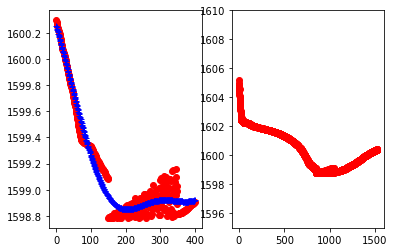

In [414]:
x = np.zeros(shape=(max))

for t in np.arange(0,max,1):
    x[t] = t * 1
#    x[t] = t * 0.05

#Transpose x 
x2 = x[:,None]
#print(x[:,None])

y = np.c_[GNSS_corr[67][:]]
print(y)


#regression
poly = preprocessing.PolynomialFeatures(degree=20,include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()


pipeline_reg = pipeline.Pipeline([('poly',poly), ('scal',scaler),('lin', lin_reg2)])
pipeline_reg.fit(x2,y)

GPR_x = range(0,max,1)
GPR_x2 = np.array(GPR_x)
GPR_x3=np.c_[GPR_x2]

#print(GPR_x3)

curve = pipeline_reg.predict(GPR_x3)
#curve2 = np.c_[curve]
plt.plot(curve, "r-")
plt.plot(GNSS_corr[67][:],"b")

plt.subplot(1,2,1)
plt.plot(GNSS_corr[67][700:1100],"ro")
plt.plot(curve[700:1100],"b+")

plt.subplot(1,2,2)
plt.plot(GNSS_corr[67][:],"ro")
plt.plot(curve,"ro")

plt.ylim(1595,1610)

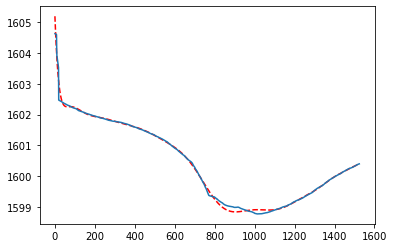

In [415]:
#plt.plot(curve[1200:1497],"r--")
#plt.plot(GNSS_drone[58][1200:1497])
plt.plot(curve,"r--")
plt.plot(GNSS_drone[67][:])

In [ ]:
#plt.plot(GNSS_drone[59][700:1100])
#plt.plot(GNSS_drone[59][:])

#st = 850
#et = 1050
#for t in np.arange(st,et,1):
#    GNSS_drone[59][t] = 0.0
    
#plt.plot(GNSS_drone[59][700:1100],"ro")
#plt.plot(GNSS_drone[59][:],"ro")

#plt.ylim(1595,1610)

In [28]:
f1=open("3Dmorph_GPR_drone.txt",'a')
np.savetxt(f1,GNSS_drone.T,"%9.3f", newline="\n")
#np.savetxt(f1,GNSS_drone,"%9.3f", newline="\n")

SN = "_1" # section number

f2=open("3Dmorph_section_GPR_drone"+SN+".txt",'a')
for n in np.arange(0,3,1):
    np.savetxt(f2,GNSS_drone[n][:],"%9.3f", newline="\n")         
